# Multi-decade land use and land cover samples for Brazil based in a stratified sampling design and visual interpretation of Landsat data (1985 — 2018)

# Acessing Samples

In [1]:
import sys
sys.path.insert(0,'../')

import pandas as pd
from pathlib import Path
from tvi.sampling import Area_Estimator
from tvi.utils import read_samples, save_csv

In [2]:
project_id = 'brazil_lulc_samples_1985_2018'
CSV_FOLDER = Path('../csv', project_id)

In [3]:
zenodo_url = 'https://zenodo.org/record/5136666/files/brazil_lulc_samples_1985_2018_row_wise.csv.gz'
samples = read_samples(zenodo_url)

[00:20:10] Read samples from https://zenodo.org/record/5136666/files/brazil_lulc_samples_1985_2018_row_wise.csv.gz


In [4]:
samples

,Unnamed: 0,id,latitude,longitude,grouped_chart,slope,strata_id,sampling_probability,sampling_weight,biome,uf,prodes_amz,prodes_cer,year,lulc_class,lulc_border,lulc_votes
0,0,1,3.080146,-59.983514,SC-21-V,D2 - Gently undulating,SC-21-V_D2,0.000006,157707.894211,Amazon,MT,0,0,1985,Grassland formation,0,2
1,1,2,-0.063239,-60.061398,SA-20-X,D6 - Rugged,SA-20-X_D6,0.002999,333.480062,Amazon,AM,0,0,1985,Other,0,3
2,2,3,4.667738,-60.879853,NA-21-V,D1 - Nearly level,NA-21-V_D1,0.000007,137744.732033,Amazon,RR,0,0,1985,Pasture,0,2
3,3,4,4.452682,-60.900604,NA-21-V,D2 - Gently undulating,NA-21-V_D2,0.000007,140649.430403,Amazon,RR,0,0,1985,Pasture,0,2
4,4,5,4.028497,-60.015853,NA-21-V,D2 - Gently undulating,NA-21-V_D2,0.000007,140649.430403,Amazon,RR,0,0,1985,Savanna formation,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2880811,85147,85148,-6.760988,-50.471703,SB-22-Z,D1 - Nearly level,SB-22-Z_D1,0.000010,97287.536327,Amazon,PA,1,0,2018,Forest formation,0,3
2880812,85148,85149,-2.593793,-48.679294,SB-22-Z,D1 - Nearly level,SB-22-Z_D1,0.000010,97287.536327,Amazon,TO,1,0,2018,Forest formation,0,3
2880813,85149,85150,-7.730360,-50.997217,SB-22-Z,D1 - Nearly level,SB-22-Z_D1,0.000010,97287.536327,Amazon,PA,1,0,2018,Forest formation,0,3
2880814,85150,85151,-7.021589,-50.215683,SB-22-Z,D1 - Nearly level,SB-22-Z_D1,0.000010,97287.536327,Amazon,PA,1,0,2018,Pasture,0,3


# Area Estimator

In [5]:
params = {
    "samples": samples,
    "weight_col": 'sampling_weight',
    "strata_col": 'strata_id',
    "lulc_col": 'lulc_class',
    "year_col": 'year',
    "id_col": 'id',
    "pixel_size": 30,
    "confidence_interval": 0.96
}

area_estimator = Area_Estimator(**params)

In [6]:
pd.DataFrame(area_estimator.lulc_list, columns=['lulc'])

,lulc
0,Grassland formation
1,Other
2,Pasture
3,Savanna formation
4,Other non-forest natural formation
5,Forest formation
6,Water
7,Annual crop
8,Urban infrastructure
9,Tree plantation


# Land Use and Land Cover Dynamics

[00:20:17] Estimating area of 13 LULC classes for Brazil (34 years)
[00:21:51] Finished


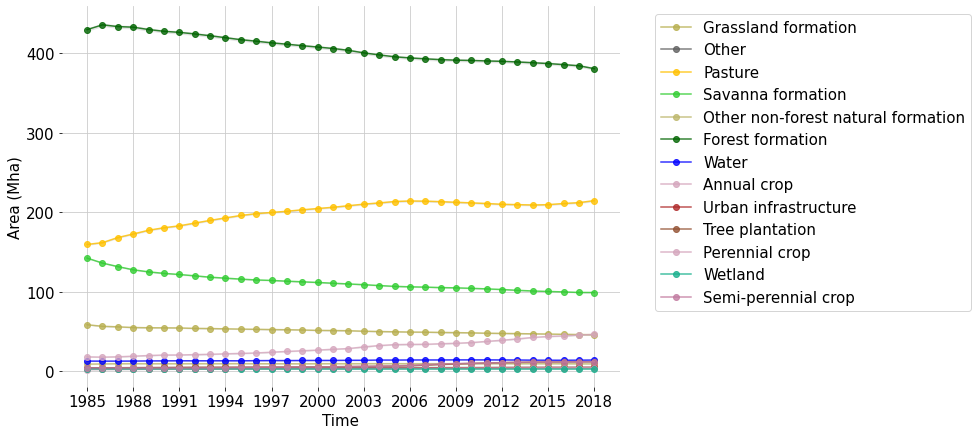

In [7]:
lulc_brazil = area_estimator.lulc()
area_estimator.plot(lulc_brazil)

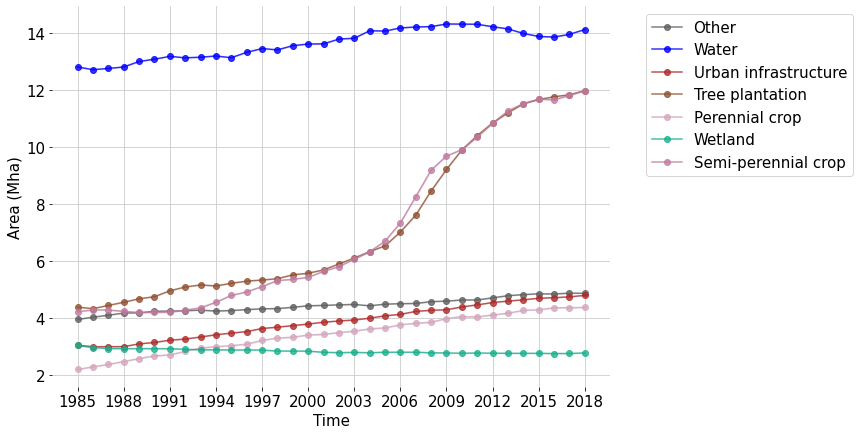

In [8]:
lulc_list = [
    'Other', 
    'Water', 
    'Urban infrastructure', 
    'Tree plantation', 
    'Perennial crop', 
    'Wetland', 
    'Semi-perennial crop'
]

area_estimator.plot(
    lulc_brazil[lulc_brazil['lulc'].isin(lulc_list)]
)

[00:21:52] Estimating area of 13 LULC classes for Amazon (34 years)
[00:23:11] Finished
[00:23:11] Estimating area of 13 LULC classes for Cerrado (34 years)
[00:24:14] Finished
[00:24:15] Estimating area of 13 LULC classes for Pantanal (34 years)
[00:24:53] Finished
[00:24:53] Estimating area of 13 LULC classes for Atlantic Forest (34 years)
[00:25:53] Finished
[00:25:53] Estimating area of 13 LULC classes for Caatinga (34 years)
[00:26:37] Finished
[00:26:38] Estimating area of 13 LULC classes for Pampa (34 years)
[00:27:22] Finished


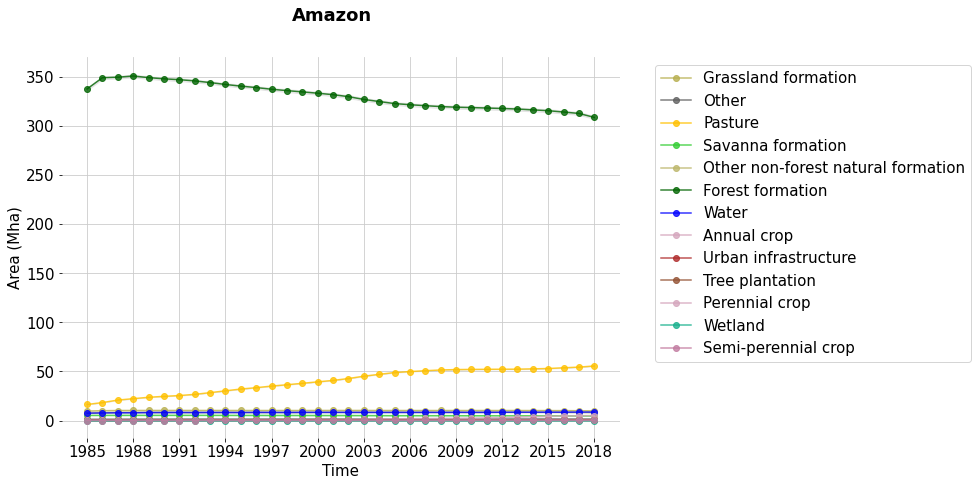

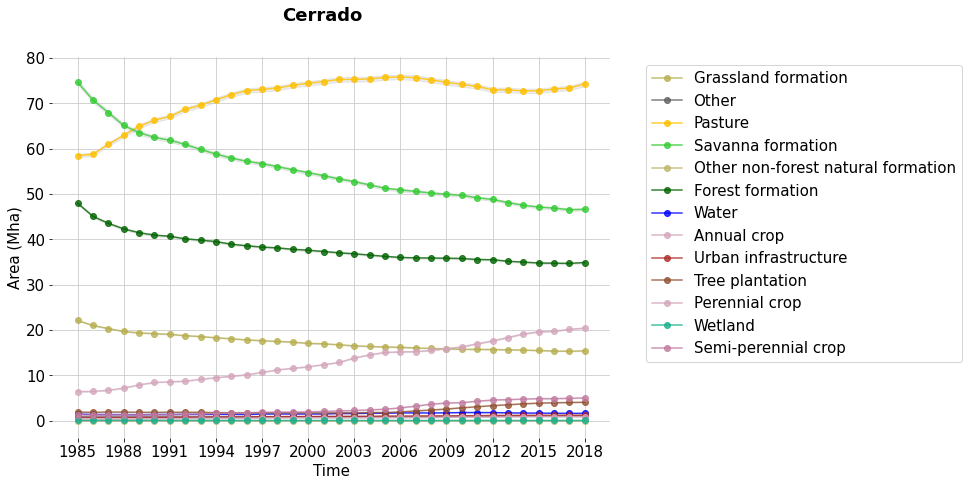

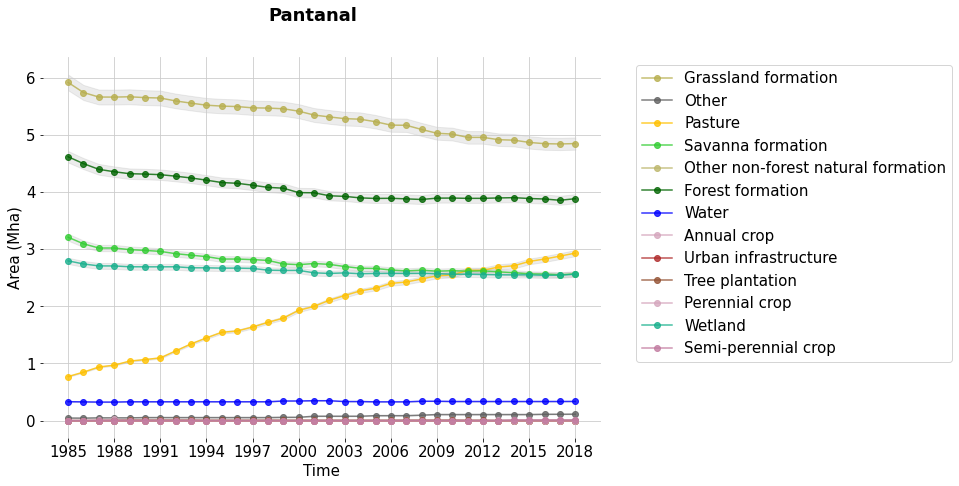

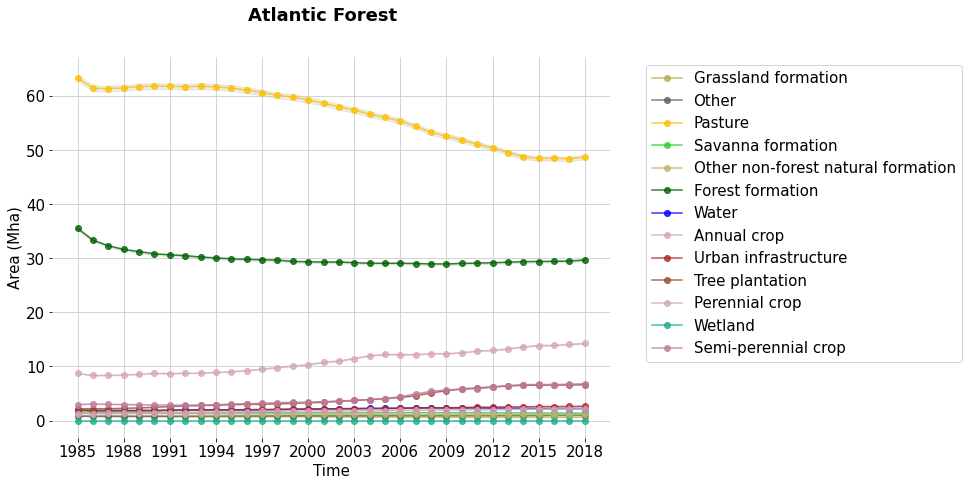

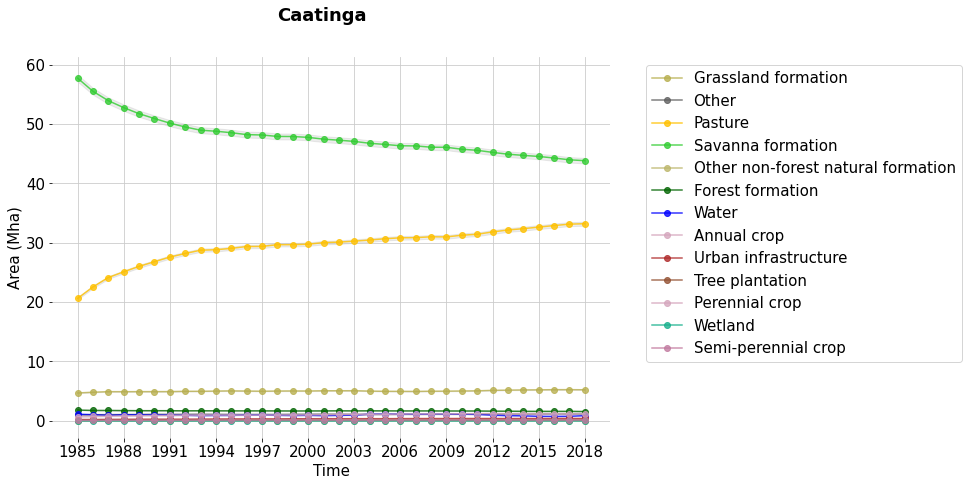

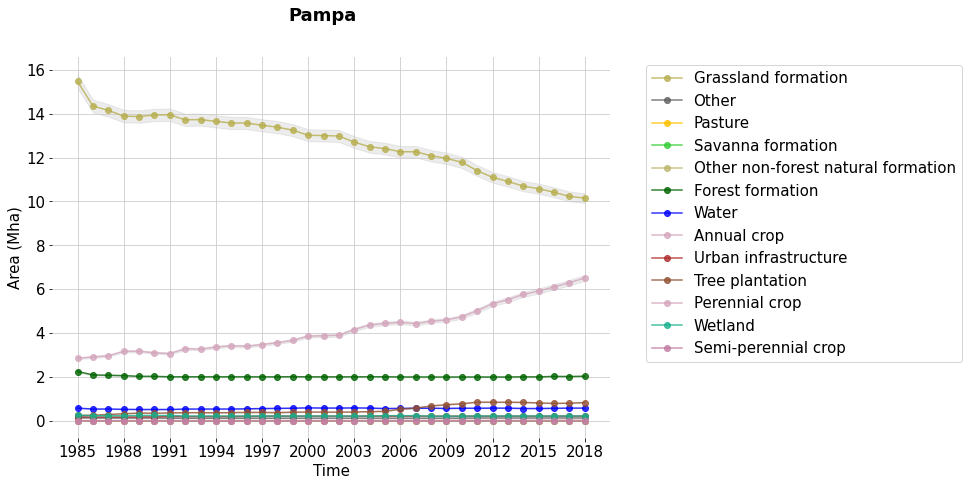

In [9]:
lulc_biomes = area_estimator.lulc_by_region('biome')

for biome in area_estimator._unique_vals('biome'):
    area_estimator.plot(
        lulc_biomes[lulc_biomes['region'] == biome], title=biome
    )

In [10]:
save_csv(lulc_brazil, CSV_FOLDER.joinpath('lulc_brazil.csv'))
save_csv(lulc_biomes, CSV_FOLDER.joinpath('lulc_biomes.csv'))

# Historical Deforestation

In [11]:
lulc_antrophic = ['Pasture','Annual crop','Tree plantation','Semi-perennial crop','Urban infrastructure','Perennial crop']
lulc_natural = ['Savanna formation', 'Grassland formation', 'Forest formation']

[00:27:24] Estimating lulc change area of Savanna formation for Brazil (30 years)
[00:28:07] Finished
[00:28:07] Estimating lulc change area of Grassland formation for Brazil (30 years)
[00:28:49] Finished
[00:28:49] Estimating lulc change area of Forest formation for Brazil (30 years)
[00:29:33] Finished


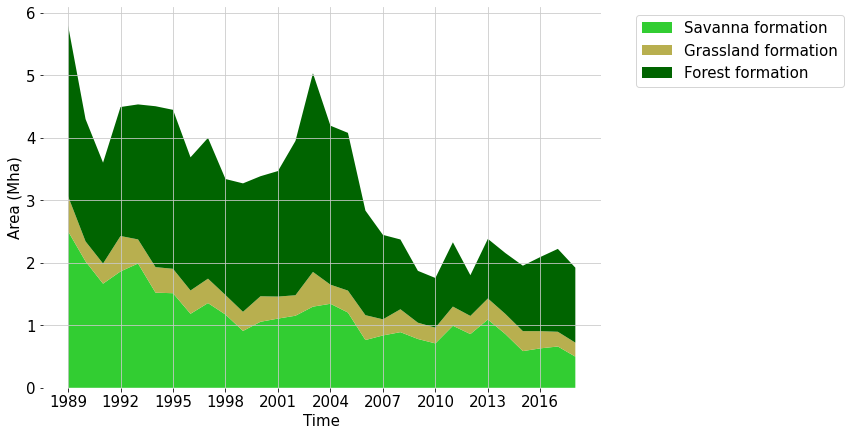

In [12]:
lulc_change_colors = ['#32CD32', '#B8AF4F', '#006400']

def_brazil = []
for veg, color in zip(lulc_natural, lulc_change_colors):
    def_brazil.append(
        area_estimator.lulc_change(veg, [veg], [veg], 33, lulc_antrophic, 1, start_year=1988, end_year=2018, color=color)
    )
def_brazil = pd.concat(def_brazil, axis=0)

area_estimator.plot(def_brazil, lulc_col='lulc_change', stacked=True)

[00:29:34] Estimating lulc change area of Primary deforestation for Amazon (30 years)
[00:30:20] Finished
[00:30:20] Estimating lulc change area of Primary deforestation for Atlantic Forest (30 years)
[00:31:02] Finished
[00:31:02] Estimating lulc change area of Primary deforestation for Caatinga (30 years)
[00:31:42] Finished
[00:31:42] Estimating lulc change area of Primary deforestation for Cerrado (30 years)
[00:32:24] Finished
[00:32:24] Estimating lulc change area of Primary deforestation for Pampa (30 years)
[00:33:05] Finished
[00:33:05] Estimating lulc change area of Primary deforestation for Pantanal (30 years)
[00:33:45] Finished


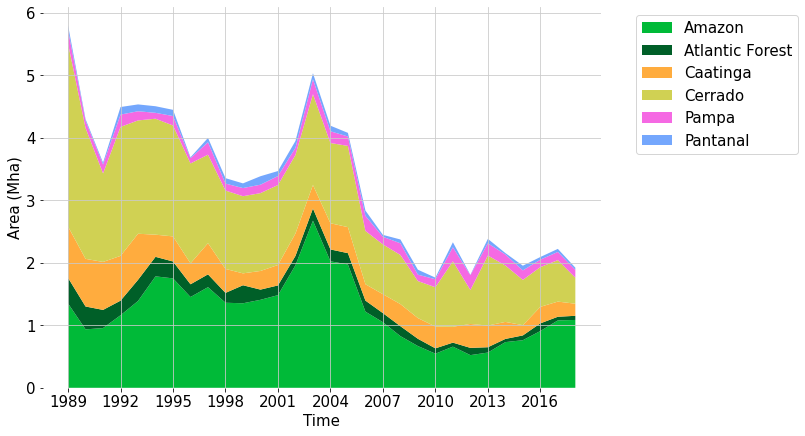

In [13]:
biomes_colors = ["#00ba38", "#005f28", "#ffac3e", "#d0d153", '#f569e3', '#74a7fd']
biomes = area_estimator._unique_vals('biome')
biomes.sort()

def_biomes = []
for biome, color in zip(biomes, biomes_colors):
    biome_mask = (area_estimator.samples['biome'] == biome)
    def_biomes.append(
        area_estimator.lulc_change('Primary deforestation', lulc_natural, lulc_natural, 33, lulc_antrophic, 1, start_year=1988, end_year=2018, color=color,
                                  region_label=biome, region_filter=biome_mask)
    )
def_biomes = pd.concat(def_biomes, axis=0)

area_estimator.plot(def_biomes, lulc_col='region', stacked=True)

[00:33:45] Estimating lulc change area of Primary deforestation (PRODES-Like) for Amazon (30 years)
[00:34:32] Finished
[00:34:32] Estimating lulc change area of Primary deforestation (PRODES-Like) for Cerrado (30 years)
[00:35:15] Finished


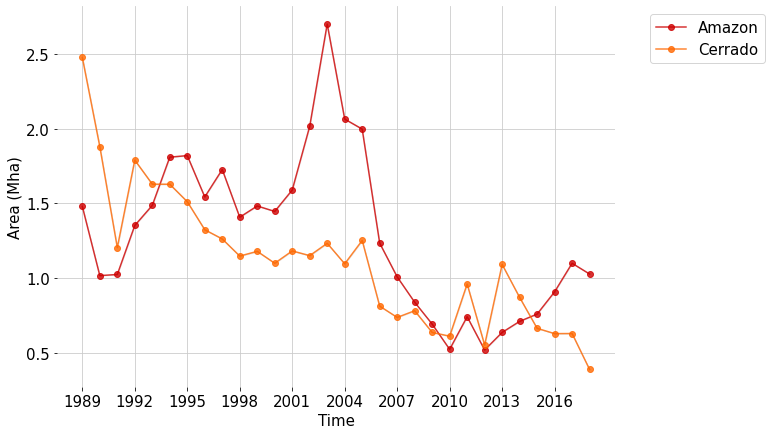

In [14]:
prodes_amz = area_estimator.lulc_change('Primary deforestation (PRODES-Like)', lulc_natural, lulc_natural, 33, lulc_antrophic, 1, 
                               start_year=1988, end_year=2018, color='#ce0000',
                               region_label='Amazon', 
                               region_filter=(samples['prodes_amz'] == 1))

prodes_cer = area_estimator.lulc_change('Primary deforestation (PRODES-Like)', lulc_natural, lulc_natural, 33, lulc_antrophic, 1, 
                               start_year=1988, end_year=2018, color='#ff6801',
                               region_label='Cerrado', 
                               region_filter=(samples['prodes_cer'] == 1))

def_prodes = pd.concat([prodes_amz, prodes_cer], axis=0)

area_estimator.plot(def_prodes, lulc_col='region')

In [15]:
save_csv(def_brazil, CSV_FOLDER.joinpath('deforestation_brazil.csv'))
save_csv(def_biomes, CSV_FOLDER.joinpath('deforestation_biomes.csv'))
save_csv(def_prodes, CSV_FOLDER.joinpath('deforestation_prodes_like.csv'))

# Agricultural Expansion

In [16]:
def agricultural_expansion(region_label = 'Brazil', region_filter = None):

    # Stable LULC
    stable_areas = area_estimator.stable_area(region_label=region_label, region_filter=region_filter, return_all_years=True)

    # Crop aggregation
    stable_crop = stable_areas[stable_areas['lulc'].isin(
        ['Stable Annual crop', 'Stable Semi-perennial crop', 'Stable Perennial crop']
    )]
    stable_crop = stable_crop.groupby(['year']).sum()
    stable_crop['lulc'] = 'Stable Crop'
    stable_crop['color'] = '#b94949'
    stable_crop['region'] = region_label
    stable_crop['year'] = range(1986, 2019)

    # Stable pasture
    stable_past = stable_areas[stable_areas['lulc'] == 'Stable Pasture']
    stable_past['color'] = '#c6b85d'
    
    stable_agricultural = pd.concat([stable_past, stable_crop], axis = 0, sort=True)

    # Dynamic agricultural args 
    past = ['Pasture']
    vege = ['Forest formation', 'Grassland formation', 'Savanna formation']
    crop = ['Annual crop', 'Semi-perennial crop', 'Perennial crop']
    
    nyears = 34
    start = 1985
    end = 2018

    change_arr = [
        ('Secondary veg. over pasture', past, past, nyears, vege, nyears, start, end, True, '#19a001', region_label, region_filter),
        ('Pasture over native veg.', vege, vege, nyears, past, nyears, start, end, True, '#eed015', region_label, region_filter),

        ('Crop over pasture', past, past, nyears, crop, nyears, start, end, True, '#f08e07', region_label, region_filter),
        ('Crop over native veg.', vege, vege, nyears, crop, nyears, start, end, True, '#ff0000', region_label, region_filter)
    ]

    # Dynamic agricultural area
    dynamic_agricultural = []

    for args in change_arr:
        dynamic_agricultural.append(
            area_estimator.lulc_change(*args)
        )

    dynamic_agricultural = pd.concat(dynamic_agricultural, axis=0).rename(columns={'lulc_change': 'lulc'})
    
    return pd.concat([stable_agricultural, dynamic_agricultural], axis=0, sort=True) 

[00:35:16] Estimating stable area of 13 LULC classes for Brazil (34 years)
[00:35:16] Estimating lulc change area of Grassland formation for Brazil (1 years)
[00:35:16] Estimating lulc change area of Other for Brazil (1 years)
[00:35:16] Estimating lulc change area of Pasture for Brazil (1 years)
[00:35:16] Estimating lulc change area of Savanna formation for Brazil (1 years)
[00:35:16] Estimating lulc change area of Other non-forest natural formation for Brazil (1 years)
[00:35:16] [00:35:16] Estimating lulc change area of Water for Brazil (1 years)
Estimating lulc change area of Forest formation for Brazil (1 years)
[00:35:16] Estimating lulc change area of Annual crop for Brazil (1 years)


/home/leandro/.local/lib/python3.8/site-packages/joblib/parallel.py:733: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  n_jobs = self._backend.configure(n_jobs=self.n_jobs, parallel=self,


[00:35:22] Finished
[00:35:22] Estimating lulc change area of Urban infrastructure for Brazil (1 years)
[00:35:24] Finished
[00:35:24] Finished
[00:35:24] Estimating lulc change area of Tree plantation for Brazil (1 years)
[00:35:24] Estimating lulc change area of Perennial crop for Brazil (1 years)
[00:35:24] Finished
[00:35:24] Finished
[00:35:24] Estimating lulc change area of Wetland for Brazil (1 years)
[00:35:24] Estimating lulc change area of Semi-perennial crop for Brazil (1 years)
[00:35:24] Finished
[00:35:24] Finished
[00:35:25] Finished
[00:35:26] Finished
[00:35:28] Finished
[00:35:28] Finished
[00:35:28] Finished
[00:35:28] Finished
[00:35:28] Finished
[00:35:28] Estimating lulc change area of Secondary veg. over pasture for Brazil (33 years)
[00:36:14] Finished
[00:36:14] Estimating lulc change area of Pasture over native veg. for Brazil (33 years)
[00:37:00] Finished
[00:37:00] Estimating lulc change area of Crop over pasture for Brazil (33 years)
[00:37:45] Finished
[0

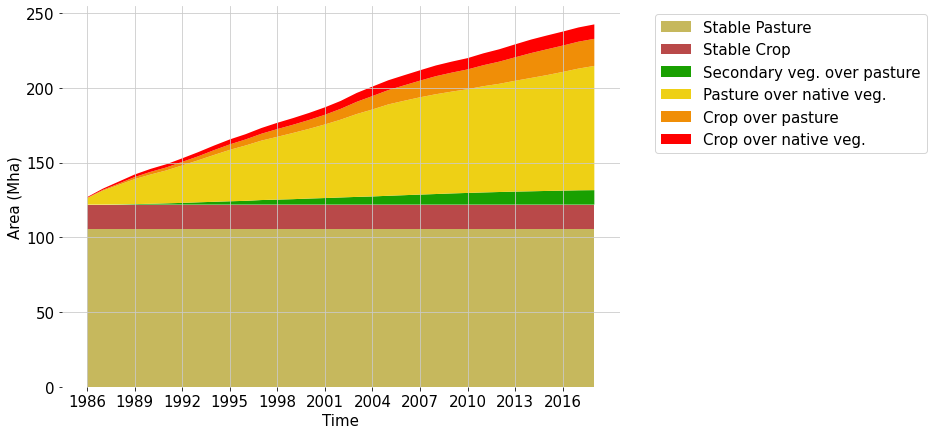

In [17]:
agriculture_brazil = agricultural_expansion()
area_estimator.plot(agriculture_brazil, stacked=True)

## Biomes

[00:38:34] Estimating stable area of 13 LULC classes for Amazon (34 years)
[00:38:35] Estimating lulc change area of Other non-forest natural formation for Amazon (1 years)
[00:38:35] Estimating lulc change area of Other for Amazon (1 years)
[00:38:35] Estimating lulc change area of Grassland formation for Amazon (1 years)
[00:38:35] Estimating lulc change area of Annual crop for Amazon (1 years)
[00:38:35] Estimating lulc change area of Forest formation for Amazon (1 years)
[00:38:35] Estimating lulc change area of Savanna formation for Amazon (1 years)
[00:38:35] Estimating lulc change area of Pasture for Amazon (1 years)
[00:38:35] Estimating lulc change area of Water for Amazon (1 years)
[00:38:41] Finished
[00:38:41] Finished
[00:38:41] Estimating lulc change area of Urban infrastructure for Amazon (1 years)
[00:38:41] Estimating lulc change area of Tree plantation for Amazon (1 years)
[00:38:42] Finished
[00:38:42] Finished
[00:38:42] Finished
[00:38:42] Estimating lulc change ar

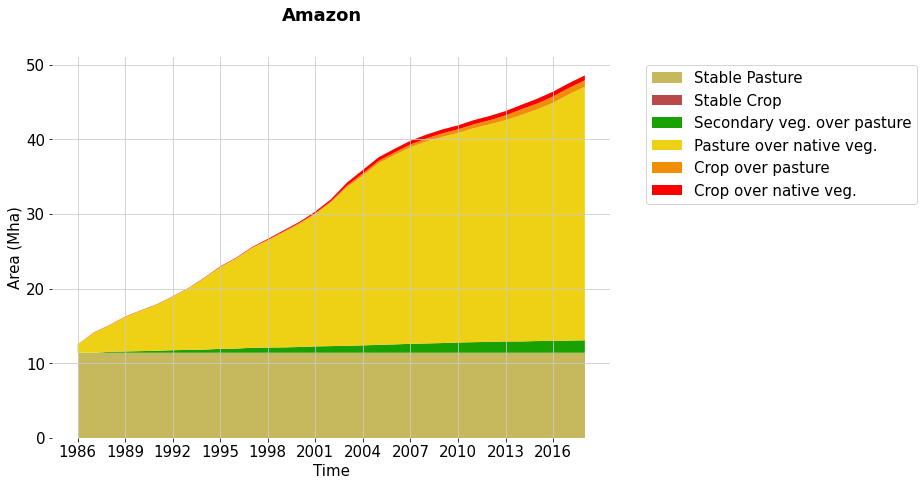

[00:41:45] Estimating stable area of 13 LULC classes for Cerrado (34 years)
[00:41:45] Estimating lulc change area of Water for Cerrado (1 years)
[00:41:45] Estimating lulc change area of Savanna formation for Cerrado (1 years)
[00:41:45] Estimating lulc change area of Other non-forest natural formation for Cerrado (1 years)
[00:41:45] Estimating lulc change area of Other for Cerrado (1 years)
[00:41:45] Estimating lulc change area of Grassland formation for Cerrado (1 years)
[00:41:45] Estimating lulc change area of Annual crop for Cerrado (1 years)
[00:41:45] Estimating lulc change area of Pasture for Cerrado (1 years)
[00:41:45] Estimating lulc change area of Forest formation for Cerrado (1 years)
[00:41:51] Finished
[00:41:51] Finished
[00:41:51] [00:41:51] Finished
Finished
[00:41:51] Estimating lulc change area of Urban infrastructure for Cerrado (1 years)
[00:41:51] Finished
[00:41:51] Finished
[00:41:51] Estimating lulc change area of Perennial crop for Cerrado (1 years)
[00:41

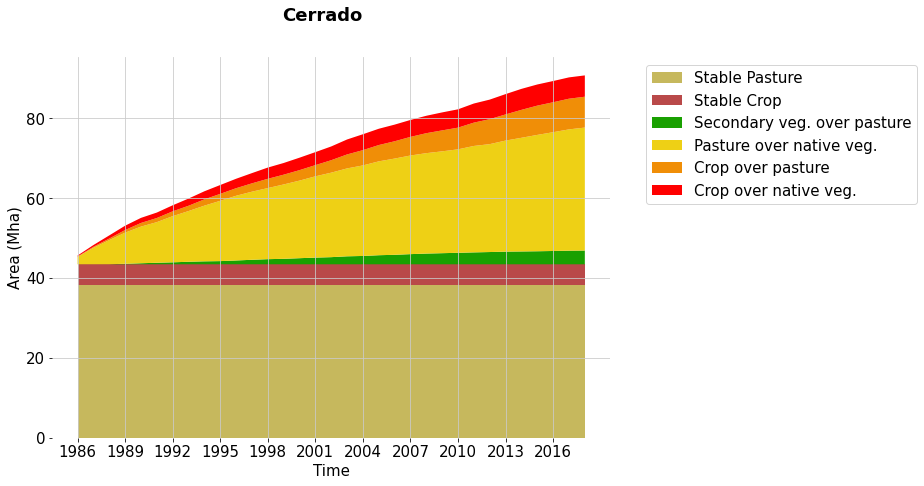

[00:45:06] Estimating stable area of 13 LULC classes for Pantanal (34 years)
[00:45:06] Estimating lulc change area of Other for Pantanal (1 years)
[00:45:06] Estimating lulc change area of Pasture for Pantanal (1 years)
[00:45:06] Estimating lulc change area of Water for Pantanal (1 years)
[00:45:06] Estimating lulc change area of Grassland formation for Pantanal (1 years)
[00:45:06] Estimating lulc change area of Other non-forest natural formation for Pantanal (1 years)
[00:45:06] Estimating lulc change area of Savanna formation for Pantanal (1 years)
[00:45:06] Estimating lulc change area of Annual crop for Pantanal (1 years)
[00:45:06] Estimating lulc change area of Forest formation for Pantanal (1 years)
[00:45:09] Finished
[00:45:09] Finished
[00:45:09] Finished
[00:45:09] Estimating lulc change area of Urban infrastructure for Pantanal (1 years)
[00:45:09] Estimating lulc change area of Tree plantation for Pantanal (1 years)
[00:45:09] Finished
[00:45:09] Finished
[00:45:09] Est

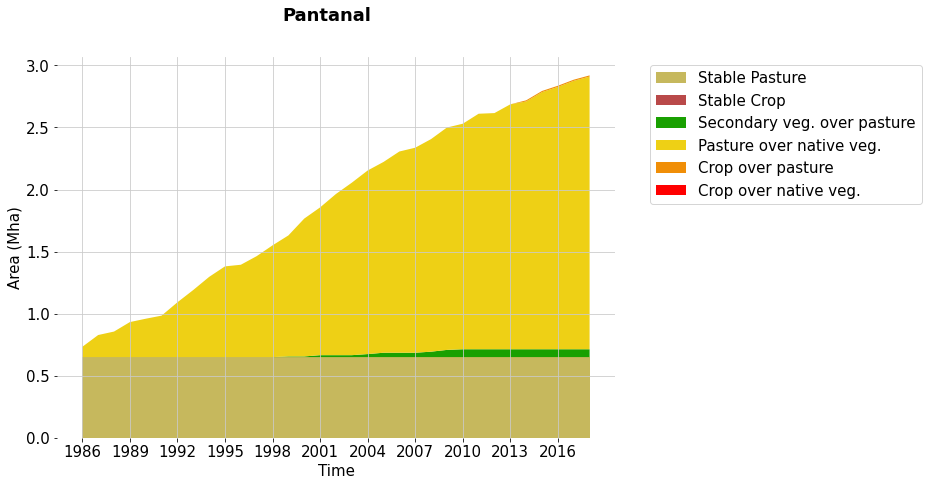

[00:48:18] Estimating stable area of 13 LULC classes for Atlantic Forest (34 years)
[00:48:18] Estimating lulc change area of Other for Atlantic Forest (1 years)
[00:48:18] Estimating lulc change area of Savanna formation for Atlantic Forest (1 years)
[00:48:18] Estimating lulc change area of Pasture for Atlantic Forest (1 years)
[00:48:18] Estimating lulc change area of Water for Atlantic Forest (1 years)
[00:48:18] Estimating lulc change area of Grassland formation for Atlantic Forest (1 years)
[00:48:18] Estimating lulc change area of Forest formation for Atlantic Forest (1 years)
[00:48:18] Estimating lulc change area of Annual crop for Atlantic Forest (1 years)
[00:48:18] Estimating lulc change area of Other non-forest natural formation for Atlantic Forest (1 years)
[00:48:23] Finished
[00:48:23] Finished
[00:48:23] Estimating lulc change area of Urban infrastructure for Atlantic Forest (1 years)
[00:48:24] Finished
[00:48:24] [00:48:24] Finished
Estimating lulc change area of Tre

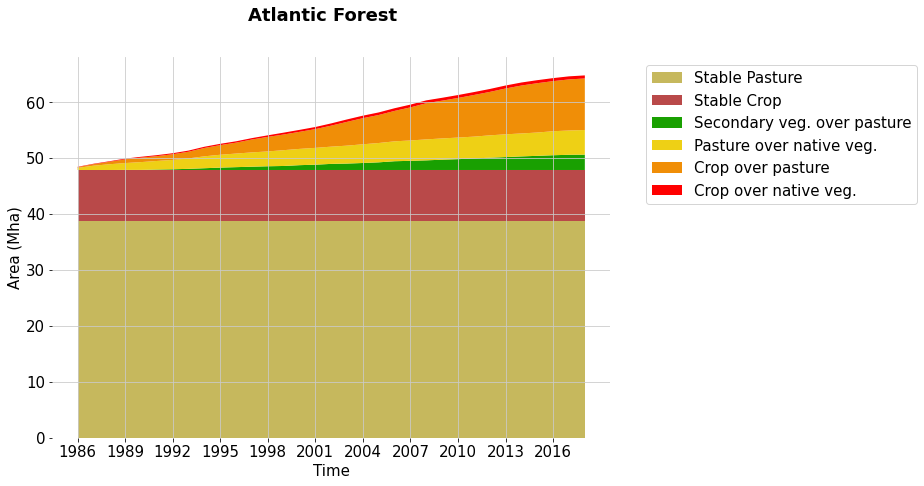

[00:51:34] Estimating stable area of 13 LULC classes for Caatinga (34 years)
[00:51:34] Estimating lulc change area of Water for Caatinga (1 years)
[00:51:34] [00:51:34] Estimating lulc change area of Grassland formation for Caatinga (1 years)
Estimating lulc change area of Other for Caatinga (1 years)
[00:51:34] Estimating lulc change area of Other non-forest natural formation for Caatinga (1 years)
[00:51:34] Estimating lulc change area of Savanna formation for Caatinga (1 years)
[00:51:34] Estimating lulc change area of Annual crop for Caatinga (1 years)
[00:51:34] Estimating lulc change area of Pasture for Caatinga (1 years)
[00:51:34] Estimating lulc change area of Forest formation for Caatinga (1 years)
[00:51:37] Finished
[00:51:37] Finished
[00:51:37] Finished
[00:51:37] Finished
[00:51:37] Estimating lulc change area of Urban infrastructure for Caatinga (1 years)
[00:51:37] [00:51:37] Estimating lulc change area of Tree plantation for Caatinga (1 years)Finished

[00:51:37] Est

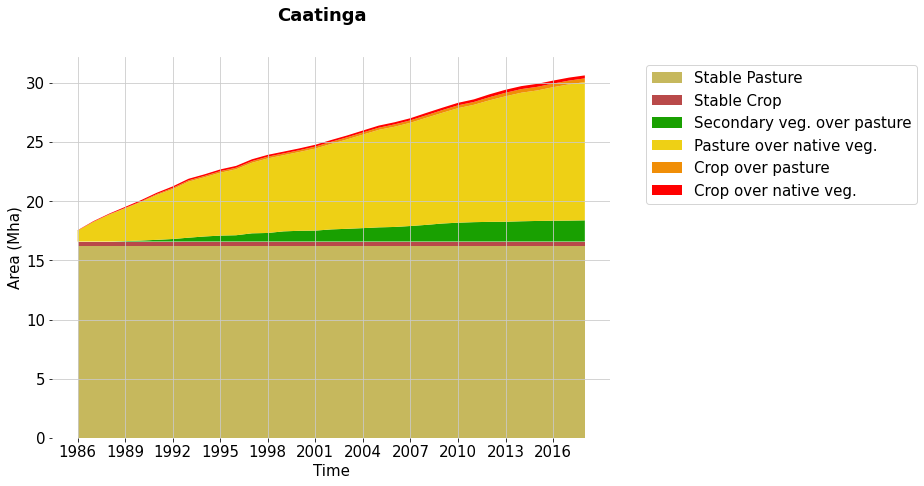

[00:54:33] Estimating stable area of 13 LULC classes for Pampa (34 years)
[00:54:33] Estimating lulc change area of Grassland formation for Pampa (1 years)
[00:54:33] Estimating lulc change area of Water for Pampa (1 years)
[00:54:33] Estimating lulc change area of Other non-forest natural formation for Pampa (1 years)
[00:54:33] Estimating lulc change area of Pasture for Pampa (1 years)
[00:54:33] Estimating lulc change area of Other for Pampa (1 years)
[00:54:33] Estimating lulc change area of Savanna formation for Pampa (1 years)
[00:54:33] Estimating lulc change area of Forest formation for Pampa (1 years)
[00:54:33] Estimating lulc change area of Annual crop for Pampa (1 years)
[00:54:37] Finished
[00:54:37] Finished
[00:54:37] Finished
[00:54:37] Estimating lulc change area of Urban infrastructure for Pampa (1 years)
[00:54:37] Estimating lulc change area of Tree plantation for Pampa (1 years)
[00:54:37] Estimating lulc change area of Perennial crop for Pampa (1 years)
[00:54:37]

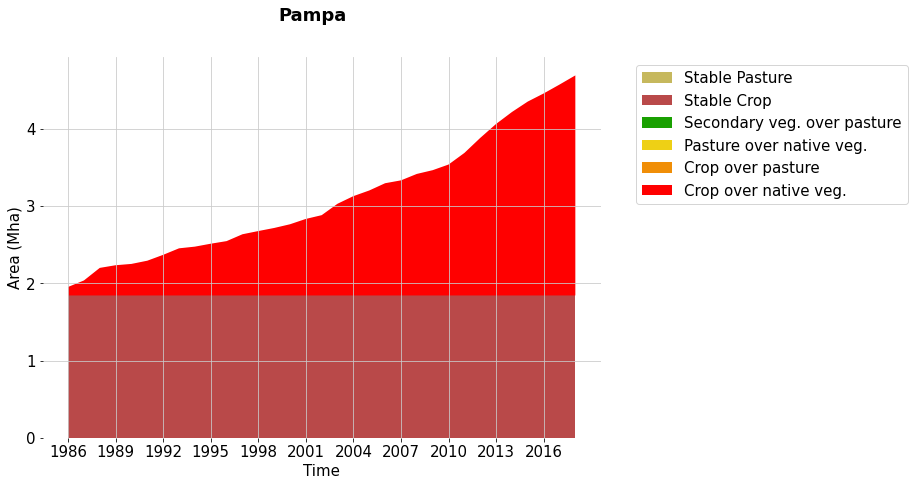

In [18]:
agriculture_biomes = []
for biome in area_estimator._unique_vals('biome'):
    biome_mask = (area_estimator.samples['biome'] == biome)
    
    agriculture_biome = agricultural_expansion(biome, biome_mask)
    area_estimator.plot(agriculture_biome, title=biome, stacked=True)
    
    agriculture_biomes.append(agriculture_biome)

agriculture_biomes = pd.concat(agriculture_biomes, axis=0)

In [19]:
save_csv(agriculture_brazil, CSV_FOLDER.joinpath('agricultural_expansion_brazil.csv'))
save_csv(agriculture_biomes, CSV_FOLDER.joinpath('agricultural_expansion_biomes.csv'))